In [1]:
import numpy as np
import math
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

# Questão 1

In [2]:
def bissecao(f, a, b, tol=1e-10, iteracao=9999):
    i  = 0;
    erro, x_ant = 1, a
    
    while(erro > tol and i < iteracao):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        
        if (inf * sup != -1):
            print("Não há raiz nesse intervalo:")
            return
        else:
            x = (a + b)/2.
            if (f(x) == 0):
                print("A raíz é:", x)
                return
            elif (inf * np.sign(f(x)) == -1):
                b = x
            else: a = x
            i += 1
        erro = np.abs((x - x_ant)/np.abs(x))
        x_ant = x
    return x

In [3]:
f = lambda x: x**5+2*x**3-5*x-2

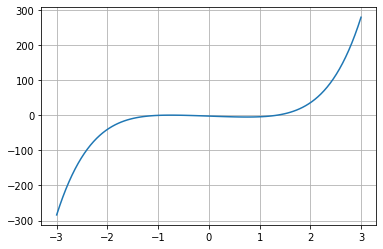

In [4]:
x = np.linspace(-3, 3, 100)
plt.plot(x, f(x))
plt.grid()

In [5]:
bissecao(f, -2, 2, 1e-4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


1.3197021484375

In [6]:
f = lambda x: ( x**2 - 2 )
bissecao(f, -1, 8, 1e-4)

1.4141082763671875

# Questão 2

In [7]:
def function(x):
    return (-0.5 * (x**2)) + 2.5*x + 4.5

# (A)

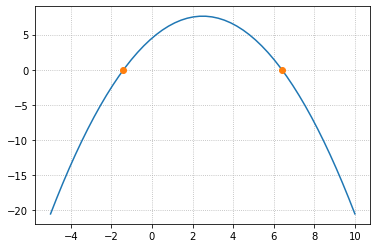

In [8]:
x = np.linspace(-5, 10)

r1 = opt.root(function, -2)
r2 = opt.root(function, 7)
rt = np.array([r1.x, r2.x])
fig = plt.figure()
a = fig.add_subplot()
plt.plot(x, function(x))
a.plot(rt, function(rt), 'o')
plt.grid(ls=':')

# (B)

In [9]:
def quadratica(a, b, c):
    delta = (b**2) - (4 * a * c) # Δ=b²- 4.a.c
    x1 = (-b-math.sqrt(delta)) / (2 * a)
    x2 = (-b+math.sqrt(delta)) / (2 * a)
    return x1, x2

print(quadratica(-0.5, 2.5, 4.5))
x1, x2 = np.roots([-0.5, 2.5, 4.5])
print(x1, x2)

(6.405124837953327, -1.405124837953327)

6.405124837953327 -1.4051248379533272


# (C)

### Erro relativo entre cada iteração

In [10]:
error = []
raizes = []

for i in range(1,5):
    if (i <= 3):
        raiz = opt.root_scalar(f,method='bisect',bracket=[5,10], maxiter=i).root
        x = opt.root_scalar(f,method='bisect',bracket=[5,10], maxiter=(i+1)).root
        raizes.append(raiz)
        error.append(np.absolute(x - raiz)/x)

for i in range(len(error)):
    print(f'Iteração: {i} \t Raiz: {raizes[i]} \t Erro: {error[i]}')

Iteração: 0 	 Raiz: 5.0 	 Erro: 0.2
Iteração: 1 	 Raiz: 6.25 	 Erro: 0.0
Iteração: 2 	 Raiz: 6.25 	 Erro: 0.0


### Erro relativo como valor real

In [11]:
error2 = []
raizes2 =[]

for i in range(1,5):
    if (i <= 3):
        raiz = opt.root_scalar(f,method='bisect',bracket=[5,10], maxiter=i).root
        raizes2.append(raiz)
        error2.append(np.absolute(6.405124837953327 - raiz)/6.405124837953327)

for i in range(len(erros)):
    print(f'Iteração: {i} \t Raiz: {raizes2[i]} \t Erro: {error2[i]}')

Iteração: 0 	 Raiz: 5.0 	 Erro: 0.2193750900259293
Iteração: 1 	 Raiz: 6.25 	 Erro: 0.024218862532411636
Iteração: 2 	 Raiz: 6.25 	 Erro: 0.024218862532411636


# Questão 3

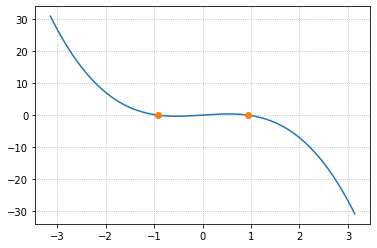

In [15]:
f = lambda x: np.sin(x) - x**3 
x = np.linspace(-np.pi, np.pi, 200)
x2 = f(x)
r1= opt.root(f, -2)
r2 = opt.root(f, 7)
mon = np.array([r1.x, r2.x])
fig = plt.figure()
a = fig.add_subplot()
plt.plot(x, x2)
a.plot(mon, f(mon), 'o')
plt.grid(ls=':')

# Questão 4

In [13]:
#f (x) = −2x6 − 1.5x4 + 10x + 20
f = lambda x: (-2*x**6) - (1.5*x**4) + (10*x) + 20
x = Symbol('x')
y = (-2*x**6) - (1.5*x**4) + (10*x) + 20
der = y.diff(x)
y1 = lambda x: (-12*x**5) - (6*x**3) + 10
print(der)
print(bissecao(y1, 0, 1, 0.05))

-12*x**5 - 6.0*x**3 + 10
0.84375


# Questão 5

In [14]:
def interp(f, xi, xs, tol=1e-10):
    i = 0;
    inf = (f(xi))
    sup = (f(xs))
    if (inf * sup >= 0):
        return -1
    erro, x_ant = 1, xi
    while (erro > tol):        
        x = xs - ( ( f(xs)*(xi-xs) ) / (f(xi)-f(xs)))
        if ((f(x) * f(xi)) < 0):
            xs = x
        else: xi = x
        i += 1
        erro = np.abs((x - x_ant)/np.abs(x))
        x_ant = x
    return x

f = lambda x: ( x**5+2*x**3-5*x-2 )

print(bissecao(f, -2, 2))
print(interp(f, -2, 2))

1.319641167181544
1.3196411670137347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
